In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
uv_march_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\march_2004\af39954a9e2016414cf0250152c06b72.nc")
uv_april_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\april_2004\1a28ebbf176d51c6aa3fccc689f0e310.nc")
uv_may_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\may_2004\1e473bb7d8596a4dc230419b4a08baaf.nc")
uv_june_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\june_2004\1e473bb7d8596a4dc230419b4a08baaf.nc")
uv_july_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\july_2004\7290f44846f4a63d5b506535533e6398.nc")
uv_august_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\august_2004\a1716806d287c72a3b21b51b779067b7.nc")
uv_september_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\september_2004\9dae241c76fcc829558111178a84a673.nc")
uv_october_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\october_2004\197170f21fdf193598eb03f7768fb867.nc")
uv_november_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\november_2004\3838e7720274de5f278c5323ab824b9b.nc")
uv_december_2005 = xr.open_dataset(r"D:\Heavy Monsoon\Data\2004\UV_Humidity\december_2004\f7311cf2f97c2477aada3975e5487269.nc")

In [3]:
uv_october_2005

<xarray.Dataset> Size: 488MB
Dimensions:         (valid_time: 744, pressure_level: 4, latitude: 121,
                     longitude: 113)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 6kB 2004-10-01 ... 2004-10-31...
  * pressure_level  (pressure_level) float64 32B 1e+03 975.0 950.0 925.0
  * latitude        (latitude) float64 968B 30.0 29.75 29.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 904B 72.0 72.25 72.5 ... 99.75 100.0
    expver          (valid_time) <U4 12kB ...
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-05T11:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [5]:
g = 9.8

levels = [1000, 975, 950, 925] # hpa
del_p = [ (levels[i] - levels[i+1]) * 100 for i in range(3) ] # convert to Pa

# select data
u = uv_october_2005['u']
v = uv_october_2005['v']
q = uv_october_2005['q']

u1, u2, u3, u4 = [u.sel(pressure_level=p) for p in levels]
v1, v2, v3, v4 = [v.sel(pressure_level=p) for p in levels]
q1, q2, q3, q4 = [q.sel(pressure_level=p) for p in levels]

In [6]:
# compute Eastward Component of moisture flux
F1 = (u1*q1 + u2*q2)/2 * del_p[0]
F2 = (u2*q2 + u3*q3)/2 * del_p[1]
F3 = (u3*q3 + u4*q4)/2 * del_p[2]
Qu = (1/g) * (F1 + F2 + F3) 

# compute Northward component of moisture flux
E1 = (v1*q1 + v2*q2)/2 * del_p[0]
E2 = (v2*q2 + v3*q3)/2 * del_p[1]
E3 = (v3*q3 + v4*q4)/2 * del_p[2]
Qv = (1/g) * (E1 + E2 + E3) 



In [7]:
# Compute VIMT
VIMT = np.sqrt(Qu**2 + Qv**2)

In [8]:
# Compute VIMT direction 
theta = (180/np.pi) * np.arctan2(-Qu, -Qv)
theta = (theta + 360) % 360

In [9]:
p = uv_october_2005.pressure_level * 100  # Pa
ds = uv_october_2005
ds = ds.assign_coords(pressure_level=p)
ds

<xarray.Dataset> Size: 488MB
Dimensions:         (valid_time: 744, latitude: 121, longitude: 113,
                     pressure_level: 4)
Coordinates:
    number          int64 8B ...
  * valid_time      (valid_time) datetime64[ns] 6kB 2004-10-01 ... 2004-10-31...
  * latitude        (latitude) float64 968B 30.0 29.75 29.5 ... 0.5 0.25 0.0
  * longitude       (longitude) float64 904B 72.0 72.25 72.5 ... 99.75 100.0
    expver          (valid_time) <U4 12kB ...
  * pressure_level  (pressure_level) float64 32B 1e+05 9.75e+04 9.5e+04 9.25e+04
Data variables:
    q               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 163MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-05T11:39 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

t = 0  # pick your time index

# --- Plot magnitude background ---
plt.contourf(ds.longitude, ds.latitude, VIMT.isel(valid_time=t),
             levels=20)
plt.colorbar(label='VIMT (kg m⁻¹ s⁻¹)')

# --- Add direction arrows ---
plt.quiver(
    ds.longitude[::3], ds.latitude[::3],
    Qu.isel(valid_time=t)[::3, ::3],
    Qv.isel(valid_time=t)[::3, ::3],
    scale=4e4, width=0.002
)

plt.title("VIMT Magnitude and Direction")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
plt.figure(figsize=(10, 8))

plt.contourf(ds.longitude, ds.latitude, theta.isel(valid_time=t),
             levels=36, cmap='hsv')
plt.colorbar(label='Moisture Transport Direction (°)')

plt.quiver(
    ds.longitude[::3], ds.latitude[::3],
    Qu.isel(valid_time=t)[::3, ::3],
    Qv.isel(valid_time=t)[::3, ::3],
    scale=4e4, color='black'
)

plt.title("VIMT Direction (°) with Moisture Flux Arrows")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


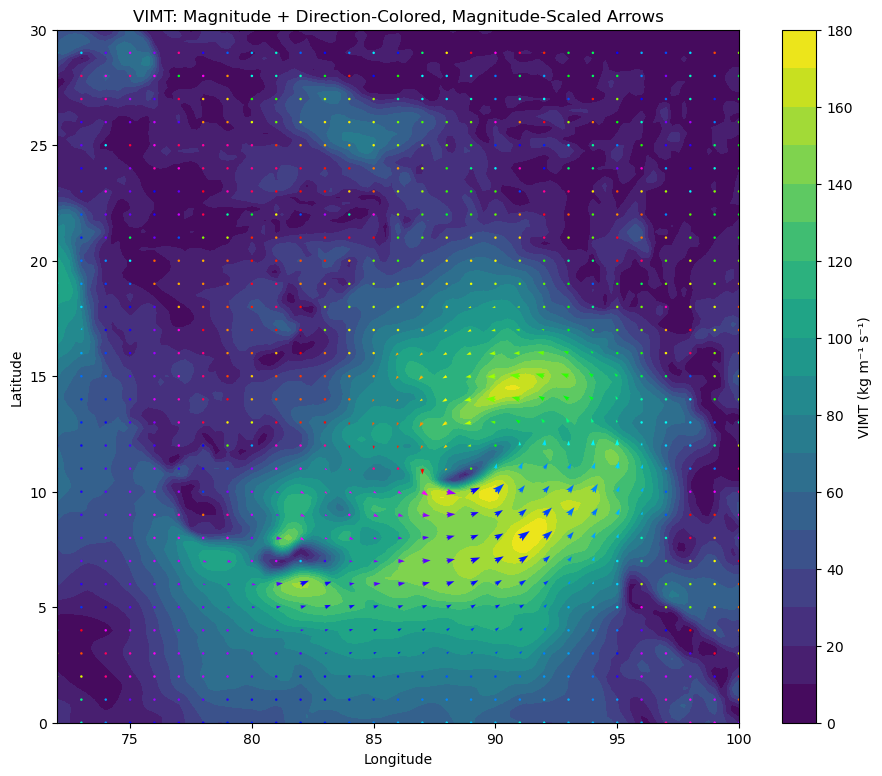

In [10]:
# --- time index ---
t = 9

# --- subsample grid to reduce number of arrows ---
step = 4   # larger = fewer arrows
lon = ds.longitude[::step]
lat = ds.latitude[::step]

Qu_s = Qu.isel(valid_time=t)[::step, ::step]
Qv_s = Qv.isel(valid_time=t)[::step, ::step]
VIMT_s = VIMT.isel(valid_time=t)[::step, ::step]
theta_s = theta.isel(valid_time=t)[::step, ::step]   # direction (0–360°)

# normalize direction 0–360 → 0–1 for HSV map
dir_norm = theta_s / 360.0  

# scale arrow length by VIMT magnitude
# (normalize VIMT to keep arrows reasonable)
Vnorm = VIMT_s / VIMT_s.max()

# --- create figure ---
plt.figure(figsize=(11, 9))

# background magnitude
plt.contourf(ds.longitude, ds.latitude, VIMT.isel(valid_time=t),
             levels=20, cmap='viridis')
plt.colorbar(label='VIMT (kg m⁻¹ s⁻¹)')

# --- arrows: colored by direction & length scaled by VIMT ---
plt.quiver(
    lon, lat,
    Qu_s * Vnorm,     # scale length by magnitude
    Qv_s * Vnorm,
    dir_norm,         # color = direction
    cmap='hsv',       # color wheel
    scale=1e4,        # lower = longer arrows
    width=0.004,      # thicker arrows
    headwidth=4,
    headlength=6,
    headaxislength=5
)

plt.title("VIMT: Magnitude + Direction-Colored, Magnitude-Scaled Arrows")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()



###  DAILY MEAN

In [11]:
daily_Qu = Qu.resample(valid_time="1D").mean()
daily_Qv = Qv.resample(valid_time="1D").mean()
daily_VIMT = VIMT.resample(valid_time="1D").mean()
